Hunter Bennett | Glass Lab | Kupffer Strains Project | 04 June 2021

In [16]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Set working directory

In [17]:
leptinDirectory = '/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/'
controlDirectory = '/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/'
workingDirectory = '/home/h1bennet/strains/results/11_Strains_Leptin_6h_ATAC'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

### Make multiwighub for QC

In [18]:
os.listdir(leptinDirectory)

['aj_Male_Kupffer_ATAC_Leptin6hrFasted_20210510L5_TDT_s20210510_GCTCATGA_TCGACTAG.aj.bowtie2_shifted_from_AJ.sam',
 'balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L2_TDT_s20210512_CGAGGCTG_CTAAGCCT.balbcj.bowtie2_shifted_from_BALBCJ.sam',
 'c57bl6j_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L3_TDT_s20210512_AAGAGGCA_CGTCTAAT.c57bl6j.bowtie2_shifted_from_C57BL6J.sam',
 'balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_CTCTCTAC_AAGGAGTA.balbcj.bowtie2_shifted_from_BALBCJ.sam.outlier_notKC',
 'c57bl6j_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L2_TDT_s20210512_GGACTCCT_ACTGCATA.c57bl6j.bowtie2_shifted_from_C57BL6J.sam',
 'aj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_AGGCAGAA_TATCCTCT.aj.bowtie2_shifted_from_AJ.sam',
 'c57bl6j_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_TCCTGAGC_GTAAGGAG.c57bl6j.bowtie2_shifted_from_C57BL6J.sam',
 'balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L3_TDT_s20210512_GTAGAGGA_TCTCTCCG.balbcj.bowtie2_shifted_fro

    makeMultiWigHub.pl hrb_strains_leptin_6h_qc mm10 \
    -color 222,45,38 222,45,38 222,45,38 222,45,38 \
    165,15,21 165,15,21 165,15,21 \
    49,130,189 49,130,189 49,130,189 49,130,189 \
    8,81,156 8,81,156 8,81,156 \
    49,163,84 49,163,84 49,163,84 49,163,84 \
    0,109,44 0,109,44 0,109,44 0,109,44 \
    -force -d /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/aj_Male_Kupffer_ATAC_Chow_healthyoung_AJ1_TDT_l20210213_GTAGAGAG_CTATTAAG_S11_L001_trim30.aj.bowtie2_shifted_from_AJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/aj_Male_Kupffer_ATAC_Chow_healthyoung_AJ2_TDT_l20210213_CAGCCTCG_AAGGCTAT_S12_L001_trim30.aj.bowtie2_shifted_from_AJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/aj_Male_Kupffer_ATAC_Chow_healthyoung_AJ3_TDT_l20210213_TGCCTCTT_GAGCCTTA_S13_L001_trim30.aj.bowtie2_shifted_from_AJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/aj_Male_Kupffer_ATAC_Chow_healthyoung_AJ4_TDT_l20210213_TCCTCTAC_TTATGCGA_S14_L001_trim30.aj.bowtie2_shifted_from_AJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/aj_Male_Kupffer_ATAC_Leptin6hrFasted_20210510L5_TDT_s20210510_GCTCATGA_TCGACTAG.aj.bowtie2_shifted_from_AJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/aj_Male_Kupffer_ATAC_Leptin6hrFasted_20210510L6_TDT_s20210510_ATCTCAGG_TTCTAGCT.aj.bowtie2_shifted_from_AJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/aj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_AGGCAGAA_TATCCTCT.aj.bowtie2_shifted_from_AJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/balbcj_Male_Kupffer_ATAC_Chow_healthyoung_BALB1_TDT_l20210213_TCATGAGC_CTCTCTAT_S15_L001_trim30.balbcj.bowtie2_shifted_from_BALBCJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/balbcj_Male_Kupffer_ATAC_Chow_healthyoung_BALB2_TDT_l20210213_CCTGAGAT_TATCCTCT_S16_L001_trim30.balbcj.bowtie2_shifted_from_BALBCJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/balbcj_Male_Kupffer_ATAC_Chow_healthyoung_BALB3_TDT_l20210213_TAGCGAGT_GTAAGGAG_S17_L001_trim30.balbcj.bowtie2_shifted_from_BALBCJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/balbcj_Male_Kupffer_ATAC_Chow_healthyoung_BALB4_TDT_l20210213_GTAGCTCC_ACTGCATA_S18_L001_trim30.balbcj.bowtie2_shifted_from_BALBCJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_CTCTCTAC_AAGGAGTA.balbcj.bowtie2_shifted_from_BALBCJ.sam \
    /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L2_TDT_s20210512_CGAGGCTG_CTAAGCCT.balbcj.bowtie2_shifted_from_BALBCJ.sam \
     /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L3_TDT_s20210512_GTAGAGGA_TCTCTCCG.balbcj.bowtie2_shifted_from_BALBCJ.sam \
     /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/c57bl6j_Male_Kupffer_ATAC_Chow_healthyoung_C571_TDT_l20210213_TACTACGC_AAGGAGTA_S19_L001_trim30 \
     /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/c57bl6j_Male_Kupffer_ATAC_Chow_healthyoung_C572_TDT_l20210213_AGGCTCCG_CTAAGCCT_S20_L001_trim30 \
     /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/c57bl6j_Male_Kupffer_ATAC_Chow_healthyoung_C573_TDT_l20210213_GCAGCGTA_CGTCTAAT_S21_L001_trim30 \
     /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/c57bl6j_Male_Kupffer_ATAC_Chow_healthyoung_C574_TDT_l20210213_CTGCGCAT_TCTCTCCG_S22_L001_trim30 \
     /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/c57bl6j_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_TCCTGAGC_GTAAGGAG.c57bl6j.bowtie2_shifted_from_C57BL6J.sam \
     /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/c57bl6j_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L2_TDT_s20210512_GGACTCCT_ACTGCATA.c57bl6j.bowtie2_shifted_from_C57BL6J.sam \
     /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/Leptin_6hours/c57bl6j_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L3_TDT_s20210512_AAGAGGCA_CGTCTAAT.c57bl6j.bowtie2_shifted_from_C57BL6J.sam

# Define samples

In [19]:
c57_control_paths = list(np.sort(glob.glob(controlDirectory+'/c57*')))
balbc_control_paths = list(np.sort(glob.glob(controlDirectory+'/balb*')))
aj_control_paths = list(np.sort(glob.glob(controlDirectory+'/aj*')))

c57_control_ids = [i.split('/')[-1].split('_')[6] for i in c57_control_paths]
balbc_control_ids = [i.split('/')[-1].split('_')[6] for i in balbc_control_paths]
aj_control_ids = [i.split('/')[-1].split('_')[6] for i in aj_control_paths]

In [20]:
c57_leptin_paths = list(np.sort(glob.glob(leptinDirectory+'/*c57*sam')))
balbc_leptin_paths = list(np.sort(glob.glob(leptinDirectory+'/*balb*sam')))
aj_leptin_paths = list(np.sort(glob.glob(leptinDirectory+'/aj*sam')))

c57_leptin_ids = [i.split('/')[-1].split('_')[5] for i in c57_leptin_paths]
balbc_leptin_ids = [i.split('/')[-1].split('_')[5] for i in balbc_leptin_paths]
aj_leptin_ids = [i.split('/')[-1].split('_')[5] for i in aj_leptin_paths]

In [21]:
ids = ['c57_kupffer_control_atac',
       'c57_kupffer_leptin_2hours_atac',
       'balbc_kupffer_control_atac',
       'balbc_kupffer_leptin_2hours_atac',
       'aj_kupffer_control',
       'aj_kupffer_leptin_2hours'
      ]

colors = ['#74c476',
          '#006d2c',
          '#6baed6',
          '#08519c',
          '#de2d26',
          '#a50f15'
         ]

paths = [';'.join(c57_control_paths),
         ';'.join(c57_leptin_paths),
         ';'.join(balbc_control_paths),
         ';'.join(balbc_leptin_paths),
         ';'.join(aj_control_paths),
         ';'.join(aj_leptin_paths)
        ]

short_ids = [';'.join(c57_control_ids),
             ';'.join(c57_leptin_ids),
             ';'.join(balbc_control_ids),
             ';'.join(balbc_leptin_ids),
             ';'.join(aj_control_ids),
             ';'.join(aj_leptin_ids)
            ]

pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

In [22]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

In [23]:
pd.DataFrame([ids,colors,paths,short_ids]).T

,0,1,2,3
0,c57_kupffer_control_atac,#74c476,/gpfs/data01/glasslab/home/h1bennet/strains/da...,C571;C572;C573;C574
1,c57_kupffer_leptin_2hours_atac,#006d2c,/gpfs/data01/glasslab/home/h1bennet/strains/da...,20210512L1;20210512L2;20210512L3
2,balbc_kupffer_control_atac,#6baed6,/gpfs/data01/glasslab/home/h1bennet/strains/da...,BALB1;BALB2;BALB3;BALB4
3,balbc_kupffer_leptin_2hours_atac,#08519c,/gpfs/data01/glasslab/home/h1bennet/strains/da...,20210512L2;20210512L3
4,aj_kupffer_control,#de2d26,/gpfs/data01/glasslab/home/h1bennet/strains/da...,AJ1;AJ2;AJ3;AJ4
5,aj_kupffer_leptin_2hours,#a50f15,/gpfs/data01/glasslab/home/h1bennet/strains/da...,20210510L5;20210510L6;20210512L1


    source activate r-ouyangPipe

    alignStats.R sampleDef.txt > qcStats.txt

# Quality control

In [14]:
qc = pd.read_csv('./qcStats.txt', sep='\t', index_col=0)
qc.index.rename('sample', inplace=True)
qc = qc.reset_index()

In [15]:
qc

,sample,alignerTotal,alignerUnique,alignerUniqueRate,alignerMulti,homerUniPos,homerTotal,tagPosition,FragLength,peakSize,homerAvgLength,mitoNum,mitoRate
0,c57_kupffer_control_atac_C571,40717020.0,29183836.0,0.716748,10950844.0,22032157,25420959.5,1.153812,34,36,29.995,8334604.0,0.246911
1,c57_kupffer_control_atac_C572,15895013.0,11384442.0,0.716227,4235763.0,12046557,9958063.5,0.826632,34,36,29.995,3180287.0,0.242061
2,c57_kupffer_control_atac_C573,17002269.0,11964130.0,0.703678,4772198.0,12964463,9950593.0,0.767528,34,36,29.995,4006860.0,0.287077
3,c57_kupffer_control_atac_C574,21867726.0,16443013.0,0.751931,5013015.0,18068942,15960846.5,0.883330,34,36,29.995,2571956.5,0.138779
4,c57_kupffer_leptin_2hours_atac_20210512L1,17889704.0,11051768.0,0.617773,5909929.0,4640115,12639616.0,2.723988,71,83,29.997,3910830.0,0.309411
5,c57_kupffer_leptin_2hours_atac_20210512L2,50083527.0,30913462.0,0.617238,14078089.0,7094821,34740047.0,4.896536,71,73,29.997,5850882.0,0.168419
6,c57_kupffer_leptin_2hours_atac_20210512L3,22244018.0,14821507.0,0.666314,6879535.0,8182220,16578402.0,2.026150,71,76,29.992,3144441.0,0.189671
7,balbc_kupffer_control_atac_BALB1,14616626.0,10751577.0,0.735572,3588930.0,11919580,12221846.0,1.025359,109,135,29.986,2588544.0,0.211796
8,balbc_kupffer_control_atac_BALB2,19331277.0,13924139.0,0.720291,4841758.0,12546825,15945259.0,1.270860,110,128,29.987,4070300.5,0.255267
9,balbc_kupffer_control_atac_BALB3,18399559.0,13051326.0,0.709328,4904196.0,12908985,15052491.5,1.166048,172,172,29.987,3789267.5,0.251737


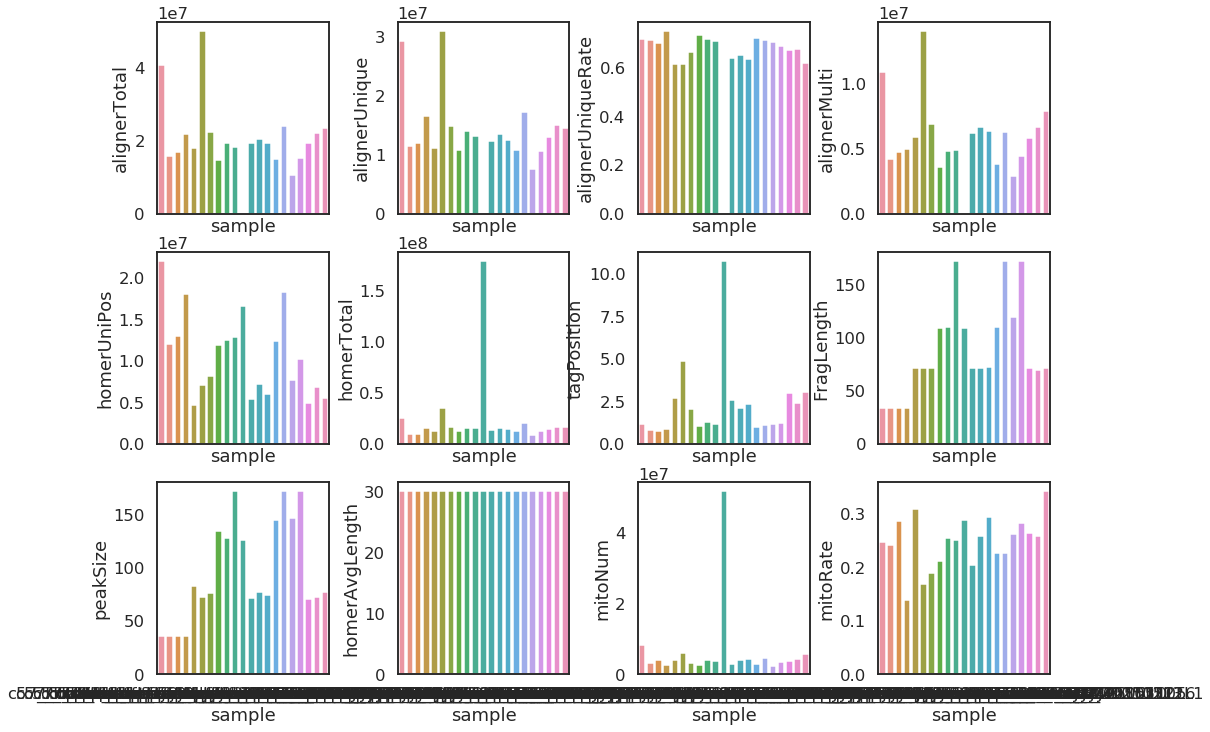

In [16]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12), sharex=True)
plt.subplots_adjust(wspace=0.4)

for col, ax in zip(qc.columns[1:], axs.flat):
    sns.barplot(x='sample', y=col, data=qc, ax=ax)

### Plot tag count distribution

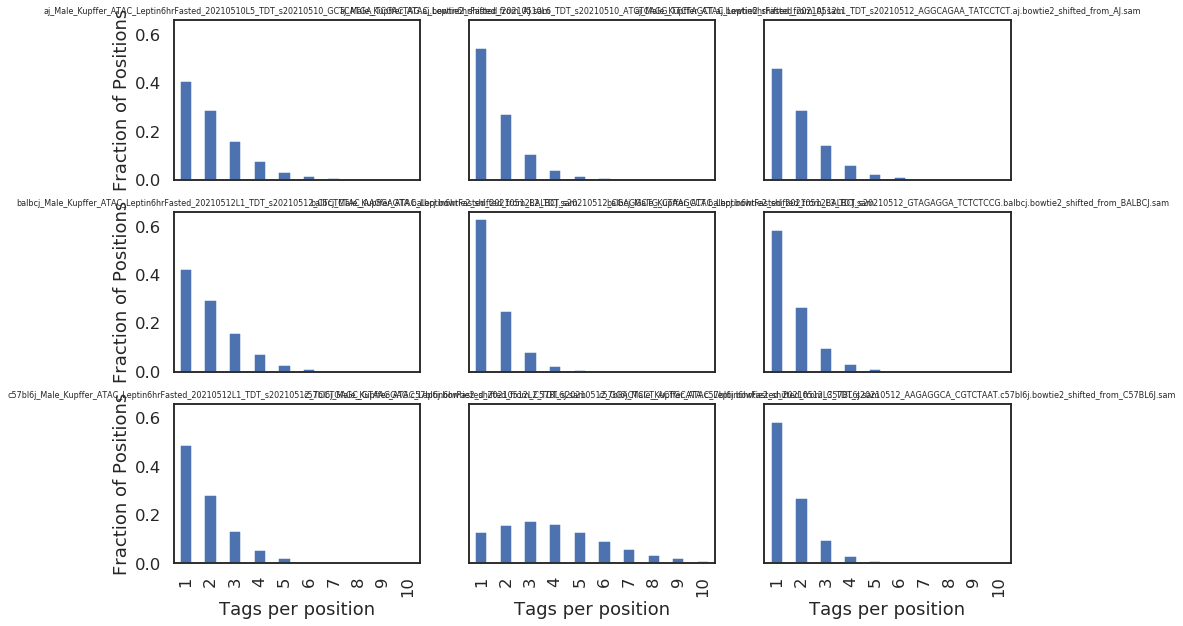

In [20]:
tds = glob.glob(leptinDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(3,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

# Call Peaks

In [21]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./atac_peak_files/ ]; then mkdir ./atac_peak_files; fi

rm: cannot remove ‘./peakCalling_homer.sh’: No such file or directory


In [22]:
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(leptinDirectory):
        find_peaks_idr = ['findPeaks', leptinDirectory + '/' + tagdir,
                          '-L', '0', '-C', '0', '-fdr', '0.9', '-style',
                          'factor', '-size', '200', '>',
                          workingDirectory + '/atac_peak_files/' + tagdir + '_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', leptinDirectory + '/' + tagdir,
                      '-style', 'factor', '-size', '200', '>',
                      workingDirectory + '/atac_peak_files/' + tagdir + '_default_peaks.tsv',
                      '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_idr))
        f.write(' '.join(find_peaks))
f.close()

### compile peak stats for QC

In [23]:
peak_stats={}

for td in os.listdir('./atac_peak_files/'):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./atac_peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [24]:
df.sort_index(inplace=True)

### Save to file

In [25]:
df.loc[df.index.str.contains('default'), :].to_csv('./default_peak_table.txt', sep='\t')
df.loc[~df.index.str.contains('default'), :].to_csv('./idr_peak_table.txt', sep='\t')

In [26]:
df.loc[df.index.str.contains('default'), :]

,total_peaks,ip_eff,peaks_filt_input,peaks_filt_local,peaks_filt_clonal
.DS_Store_default_peaks.tsv,0.0,0.00,0.0,0.0,0.0
._.DS_Store_default_peaks.tsv,0.0,0.00,0.0,0.0,0.0
aj_Male_Kupffer_ATAC_Leptin6hrFasted_20210510L5_TDT_s20210510_GCTCATGA_TCGACTAG.aj.bowtie2_shifted_from_AJ.sam_default_peaks.tsv,58466.0,27.53,0.0,9754.0,15.0
aj_Male_Kupffer_ATAC_Leptin6hrFasted_20210510L6_TDT_s20210510_ATCTCAGG_TTCTAGCT.aj.bowtie2_shifted_from_AJ.sam_default_peaks.tsv,61943.0,25.67,0.0,12836.0,18.0
aj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_AGGCAGAA_TATCCTCT.aj.bowtie2_shifted_from_AJ.sam_default_peaks.tsv,58857.0,20.92,0.0,11184.0,16.0
balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_CTCTCTAC_AAGGAGTA.balbcj.bowtie2_shifted_from_BALBCJ.sam_default_peaks.tsv,30890.0,13.19,0.0,4064.0,24.0
balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L2_TDT_s20210512_CGAGGCTG_CTAAGCCT.balbcj.bowtie2_shifted_from_BALBCJ.sam_default_peaks.tsv,53802.0,16.57,0.0,10446.0,19.0
balbcj_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L3_TDT_s20210512_GTAGAGGA_TCTCTCCG.balbcj.bowtie2_shifted_from_BALBCJ.sam_default_peaks.tsv,54865.0,18.43,0.0,10739.0,13.0
c57bl6j_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L1_TDT_s20210512_TCCTGAGC_GTAAGGAG.c57bl6j.bowtie2_shifted_from_C57BL6J.sam_default_peaks.tsv,45396.0,14.81,0.0,7188.0,16.0
c57bl6j_Male_Kupffer_ATAC_Leptin6hrFasted_20210512L2_TDT_s20210512_GGACTCCT_ACTGCATA.c57bl6j.bowtie2_shifted_from_C57BL6J.sam_default_peaks.tsv,41304.0,12.31,0.0,8007.0,25.0
